Best Mean Squared Error: 83318735.67662236
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


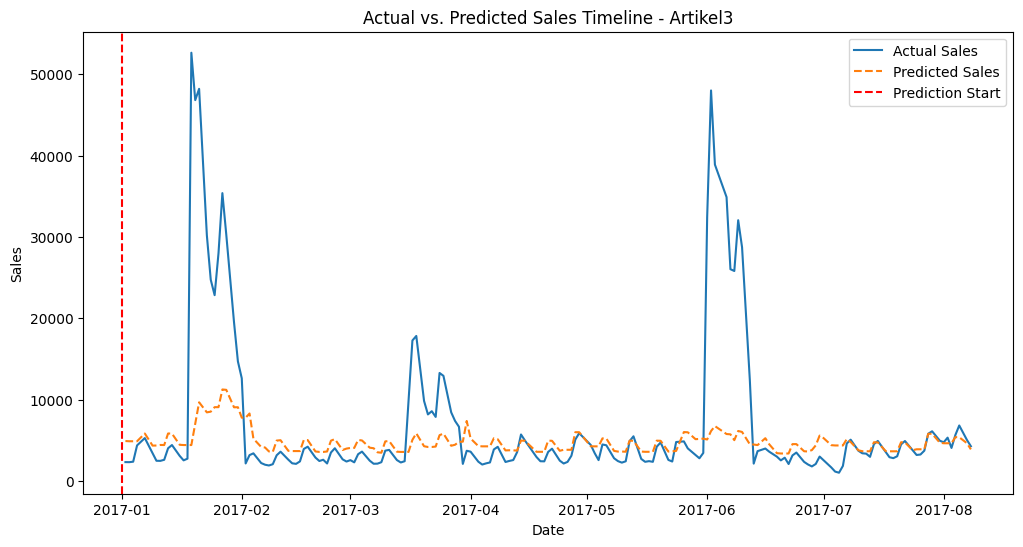

In [1]:
import numpy as np
import pandas as pd
from predict import predict, plot_timeline


In [2]:
df = pd.read_excel('data/Zeitreihen_2Artikel.xlsx')  

df_feat = prep(df)
train, test = split(df_feat)
y_pred = predict(test, filename = 'models/model_XGBOOST_Artikel3.sav')
test['predicted'] = y_pred 
plot_timeline(test, variant = '2017')


NameError: name 'prep' is not defined